In [12]:
# Load Housing data
#from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


#from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tarfile
from six.moves import urllib
# to make this notebook's output stable across runs
np.random.seed(42)
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
ENVIROMENT_PATH = pd.read_csv("enviroment.csv",thousands=',')

def load_enviroment_data(enviroment_path):
    csv_path = os.path.join(enviroment_path, "enviroment.csv")
    return pd.read_csv(csv_path)
enviroment = load_enviroment_data("/Users/yingshandeng/Desktop/python/hw/3/")
enviroment.head()

,stfips,COUNTY_NAME,STATE,fips,A_PM10_mean,A_PM25_mean,A_SO2_mean,A_NO2_mean,A_CO_mean,Per_TotPopSS_ave,...,Rented,Vacant,House_price,Median_Income,Poverty_rate,No_English,HSgraduates,Unemployment,med_rooms,Violance_index
0,1001,Autauga County,AL,1001,15.072996,12.058188,10.661088,123.657648,4.463225,10.82,...,19.17141,9.393047,94800,42013,10.9,2.8,78.7,4.9,5.8,428.29999
1,1003,Baldwin County,AL,1003,19.994603,11.119909,17.146847,247.742253,12.875833,19.58,...,20.42070,25.508510,122500,40250,10.1,4.0,82.0,4.3,5.3,482.54999
2,1005,Barbour County,AL,1005,15.772306,12.360454,23.257118,183.193624,19.620539,15.12,...,26.84216,16.467380,68600,25101,26.8,3.6,64.7,5.7,5.3,342.10001
3,1007,Bibb County,AL,1007,14.921319,12.239906,7.630953,127.779935,2.951976,10.53,...,19.80865,11.072500,74600,31420,20.6,1.8,63.2,6.2,5.4,502.25555
4,1009,Blount County,AL,1009,17.895015,12.974281,8.913795,95.198094,9.362215,16.23,...,16.51181,8.946970,86800,35241,11.7,5.6,70.4,4.8,5.5,0.00000


In [6]:
enviroment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
stfips              3141 non-null int64
COUNTY_NAME         3141 non-null object
STATE               3141 non-null object
fips                3141 non-null int64
A_PM10_mean         3141 non-null float64
A_PM25_mean         3141 non-null float64
A_SO2_mean          3141 non-null float64
A_NO2_mean          3141 non-null float64
A_CO_mean           3141 non-null float64
Per_TotPopSS_ave    3141 non-null float64
SO4Ave              3141 non-null float64
HgAve               3141 non-null float64
AvgOfD3_ave         3141 non-null float64
MEAN_AS             3141 non-null float64
MEAN_HG             3141 non-null float64
MEAN_PB             3141 non-null float64
fatal_rate          3141 non-null float64
Population          3141 non-null int64
Rented              3141 non-null float64
Vacant              3141 non-null float64
House_price         3141 non-null int64
Median_Income       3

1. Show correlation matrix between house price and pollution indicators A_PM10_mean , A_PM25_mean, A_SO2_mean, A_NO2_mean, A_CO_mean. What can you say about correlation between house price and pollution?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122a12150>,
      dtype=object)

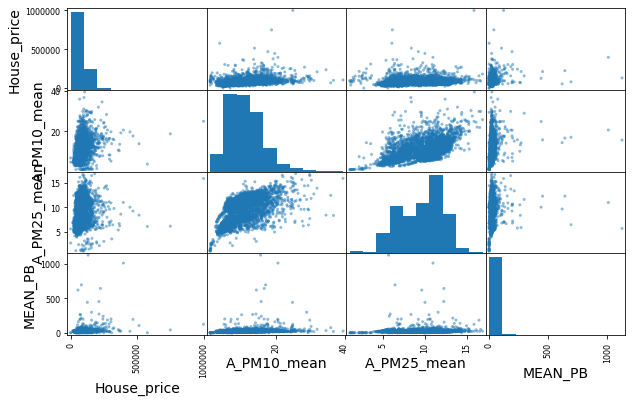

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["House_price", "A_PM10_mean", "A_PM25_mean", "MEAN_PB"]
scatter_matrix(enviroment[attributes], figsize=(10, 6))

In [19]:
corr_matrix = enviroment.corr()
corr_matrix["House_price"].sort_values(ascending=False)

House_price         1.000000
Median_Income       0.703662
HSgraduates         0.407969
Population          0.341290
A_PM10_mean         0.340191
Rented              0.270670
MEAN_PB             0.239538
A_NO2_mean          0.207452
MEAN_HG             0.180929
No_English          0.139897
A_CO_mean           0.111495
med_rooms           0.061444
A_SO2_mean          0.060931
A_PM25_mean         0.052065
AvgOfD3_ave         0.047299
MEAN_AS            -0.007468
Per_TotPopSS_ave   -0.064849
SO4Ave             -0.074284
fips               -0.082239
stfips             -0.082239
Violance_index     -0.096094
Vacant             -0.110405
Unemployment       -0.117430
fatal_rate         -0.159060
HgAve              -0.203038
Poverty_rate       -0.387343
Name: House_price, dtype: float64

Problem 2 <br>
a. Create variables: log(population) and the interaction  PM =  A_PM10_mean  * A_PM25_mean.   <br>
b. Drop [stfips', 'COUNTY_NAME','fips'] <br>
c. Create binary variable for each State <br>
d. move  House_price to the first column <br>

In [ ]:
cols = ['House_price'] + [col for col in enviroment if col != 'House_price'] enviroment = enviroment[cols]

In [20]:
enviroment["ln_pop"] = np.log(enviroment["Population"])
enviroment["PM_int"] = enviroment["A_PM10_mean"] * enviroment["A_PM25_mean"] 
enviroment = enviroment.drop(["stfips", "COUNTY_NAME","fips"], axis = 1)
cols = ['House_price'] + [col for col in enviroment if col != 'House_price'] 
enviroment = enviroment[cols]

In [21]:
full_atrib = list(enviroment.columns.values)[2:]
full_atrib

['A_PM10_mean',
 'A_PM25_mean',
 'A_SO2_mean',
 'A_NO2_mean',
 'A_CO_mean',
 'Per_TotPopSS_ave',
 'SO4Ave',
 'HgAve',
 'AvgOfD3_ave',
 'MEAN_AS',
 'MEAN_HG',
 'MEAN_PB',
 'fatal_rate',
 'Population',
 'Rented',
 'Vacant',
 'Median_Income',
 'Poverty_rate',
 'No_English',
 'HSgraduates',
 'Unemployment',
 'med_rooms',
 'Violance_index',
 'ln_pop',
 'PM_int']

3. Create and run a pipeline that standardize the data

In [23]:
env_num = enviroment.drop('STATE', axis=1)
env_cat = enviroment['STATE']

In [25]:
from sklearn.base import TransformerMixin
class MyLabelBinarizer(TransformerMixin):
def __init__(self, *args, **kwargs):
self.encoder = LabelBinarizer(*args, **kwargs)
def fit(self, x, y=0): self.encoder.fit(x) return self
def transform(self, x, y=0):
return self.encoder.transform(x)
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
def __init__(self, attribute_names): self.attribute_names = attribute_names
def fit(self, X, y=None): return self
def transform(self, X):
return X[self.attribute_names].values

IndentationError: expected an indented block (<ipython-input-25-aba324e5f767>, line 4)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler from sklearn.preprocessing import LabelBinarizer
cat_attribs = ["STATE"]
         num_pipeline = Pipeline([
                 ('selector', DataFrameSelector(num_attribs)),
                 ('std_scaler', StandardScaler()),
])
         cat_pipeline = Pipeline([
                 ('selector', DataFrameSelector(cat_attribs)),
                 ('lab_encoder',  MyLabelBinarizer()),
])

In [27]:
from sklearn.pipeline import FeatureUnion
                 ("num_pipeline", num_pipeline),
                 ("cat_pipeline", cat_pipeline),
             ])

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [ ]:
env_prepared = full_pipeline.fit_transform(enviroment)
         np.shape(env_prepared)

Problem 4. Using cross validation with 5 folds predict house price and report RMSE using linear regression with and without State indicators. Which one is better? Use random_state = 42

In [ ]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression(random_state=42)
from sklearn.metrics import mean_squared_error 
env_St = env_prepared[:,1:]
env_noSt = env_prepared[:,1:-50:]
Price = env_prepared[:,0:1:]

In [ ]:
def display_scores(scores): print("Scores:", scores)
             print("Mean:", scores.mean())
             print("Standard deviation:", scores.std())

In [ ]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score scores_State = cross_val_score(lin_reg, env_St, Price,
                                  scoring="neg_mean_squared_error", cv=5)
         print("RMSE with States")
         display_scores(np.sqrt(-scores_State))
         scores_NOState = cross_val_score(lin_reg, env_noSt, Price,
                                  scoring="neg_mean_squared_error", cv=5)
print("RMSE without States") display_scores(np.sqrt(-scores_NOState))

Problem 5. Using cross validation with 5 folds predict house price and report RMSE using regression tree with and without State indicators. Which one is better? Use random_state = 42

In [ ]:
from sklearn.ensemble import RandomForestRegressor forest_reg = RandomForestRegressor(random_state=42)
from sklearn.model_selection import cross_val_score scores_State = cross_val_score(forest_reg, env_St, Price,
                                  scoring="neg_mean_squared_error", cv=5)
         print("RMSE with States")
         display_scores(np.sqrt(-scores_State))
         scores_NOState = cross_val_score(forest_reg, env_noSt, Price,
                                  scoring="neg_mean_squared_error", cv=5)
print("RMSE without States")
display_scores(np.sqrt(-scores_NOState))

Problem 6. Do a Randomize Grid Search of forest regression using data without States with the n_estimators (1-20), the number of features (1-20) with 30 iterations,cv = 5, and random_state=42. Predict house price. <br> Which is the optimal number of features and estimators? <br> Which are the five most important features?



In [ ]:
from sklearn.model_selection import RandomizedSearchCV from scipy.stats import randint
         param_distribs = {
                 'n_estimators': randint(low=1, high=20),
                 'max_features': randint(low=1, high=20),
}
         forest_reg = RandomForestRegressor(random_state=42)
         rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                         n_iter=30, cv=5, scoring='neg_mean_squared_error', ran
         rnd_search.fit( env_noSt, Price,)

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
         feature_importances

In [ ]:
sorted(zip(feature_importances, full_atrib), reverse=True)[0:5]

In [ ]:
enviroment = load_enviroment_data()
         type(enviroment)

In [ ]:
pandas.core.frame.DataFrame